## **Lab 6 - Gaussian Process**

In general, Gaussian Process (GP) is a stochastic process used for modeling data, which were observed over time, space or both. Main thing that can characterise GP is that is a kind of generalization of normal probability distributions, where each of them describes a random variable (scalar or vector if we deal with multivariate distribution).

In [1]:
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### **Task 1: simulating from Gaussian Process model**

To make any simulations, first you need a set of observations:

In [2]:
#Observed data
x_obs = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
y_obs = [0.3285234234, 4.206074524324, 1.34524234324,
0.1123213232, -5.43234324234, -3.0585, -0.0764545343455,
-4.3423444, -0.123123133, -5.234234324324, -1.12112]

Model also needs sampling space and the indexes of where our observed data resides there:

In [4]:
x_predict = np.linspace(-11,11,551,endpoint=True)
observed_index = [20, 76, 120, 155, 220, 276, 316, 336, 426, 487, 535]

In this example we are using kernel from exponentiated quadratic family, so we need to provide its hyperparameters (alpha and rho). Moreover, for sample generation, we would like to set a sigma value. Let's start with some arbitrarily selected parameters:

In [6]:
alpha = 3.1
rho = 5.6
sigma = 2

Now we can create a model and sample from it.

In [7]:
model = CmdStanModel(stan_file='gaussian_process.stan')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process.stan to exe file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process.hpp /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process.stan
Warning in '/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Us

In [9]:
data = dict(N_predict = len(x_predict),
            x_predict = x_predict,
            N_obs = len(y_obs),
            observed_idx = observed_index,
            y_obs = y_obs,
            alpha = 3,
            rho = 5.5,
            sigma = 2)

In [10]:
result1 = model.sample(data=data, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |                                                         | 00:00 Status
chain 2 |                                                         | 00:00 Status

chain 3 |                                                         | 00:00 Status


chain 1 |██▌                                                      | 00:00 Status
chain 2 |██▌                                                      | 00:00 Status

chain 3 |██▌                                                      | 00:00 Status
chain 1 |██▏                     | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |██▏                     | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |██▏                     | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |███▎                    | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |███▎                    | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |████▎                   | 00:02 Iteration:  200 / 


INFO:cmdstanpy:CmdStan done processing.


Plotting a few samples generated from the model:

In [12]:
y_predict = result1.stan_variable('y_predict')

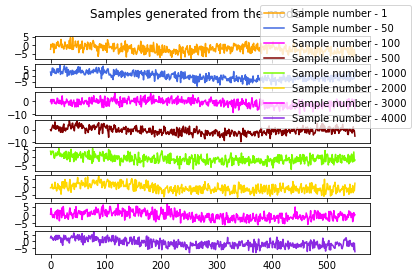

In [13]:
fig, axs = plt.subplots(8)
fig.suptitle('Samples generated from the model')
axs[0].plot(y_predict[0], color = 'orange')
axs[1].plot(y_predict[49], color = 'royalblue')
axs[2].plot(y_predict[99], color = 'magenta')
axs[3].plot(y_predict[499], color = 'maroon')
axs[4].plot(y_predict[999], color = 'lawngreen')
axs[5].plot(y_predict[1999], color = 'gold')
axs[6].plot(y_predict[2999], color = 'magenta')
axs[7].plot(y_predict[3999], color = 'blueviolet')
fig.legend(['Sample number - 1', 'Sample number - 50','Sample number - 100', 'Sample number - 500', 'Sample number - 1000', 'Sample number - 2000', 'Sample number - 3000', 'Sample number - 4000'], loc = 'upper right')

Plotting the mean value from model with its confidence interval (standar deviation, using errorbar function):

In [14]:
mean_val1= []
std_val1 = []

for y in y_predict:
    mean_val1.append(np.mean(y))
    std_val1.append(np.std(y))

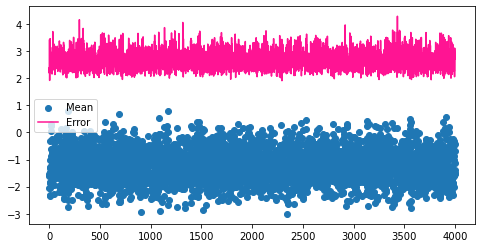

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4),sharex = True)

axes.scatter([*range(4000)], mean_val1)
axes.errorbar([*range(4000)], std_val1, color = 'deeppink')

axes.legend(['Mean','Error'])
plt.show()

#### **Task 2: Optimizing the hyperparameters**

To achive better results of GP fitting for our observed data, we need to oprimize its parameters. We can do that by using maximum marginal likelihood estimation. It can be done by placing parameters in "parameter" block in stan model and using "optimize" method.

In [17]:
model2 = CmdStanModel(stan_file = 'gaussian_process_optimize.stan')

INFO:cmdstanpy:compiling stan file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process_optimize.stan to exe file /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process_optimize
INFO:cmdstanpy:compiled model executable: /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process_optimize
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process_optimize.hpp /Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process_optimize.stan
Warning in '/Users/kamilbaradziej/PythonProjects/DataAnalytics/Lab6_Gaussian_process/gaussian_process_optimize.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically u

In [19]:
data2 = dict(x_obs = x_obs,
            N_obs = len(y_obs),
            y_obs = y_obs)

In [20]:
result2 = model2.optimize(data=data2, seed=5838298)

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


Optimizing parameters with mentioned method and generating new samples with model from task 1:

In [21]:
opti_alpha = result2.stan_variable('alpha')
opti_rho = result2.stan_variable('rho')
opti_sigma = result2.stan_variable('sigma')

print('alpha',opti_alpha)
print('rho',opti_rho)
print('sigma',opti_sigma)

alpha 3.06165
rho 1.08609
sigma 0.196708


In [24]:
data3 = dict(N_predict = len(x_predict),
            x_predict = x_predict,
            N_obs = len(y_obs),
            observed_idx = observed_idx,
            y_obs = y_obs,
            alpha = opti_alpha,
            rho = opti_rho,
            sigma = opti_sigma)

In [25]:
result3 = model.sample(data=data3, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |                                                         | 00:00 Status
chain 2 |                                                         | 00:00 Status

chain 3 |                                                         | 00:00 Status


chain 1 |██▌                                                      | 00:00 Status


chain 4 |██▌                                                      | 00:00 Status
chain 2 |██▌                                                      | 00:00 Status

chain 1 |██▏                     | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |██▏                     | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |██▏                     | 00:04 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |██▏                     | 00:04 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▎                    | 00:08 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |███▎                    | 00:09 Iteration:  100 /


INFO:cmdstanpy:CmdStan done processing.


In [26]:
y_predict2 = result3.stan_variable('y_predict')

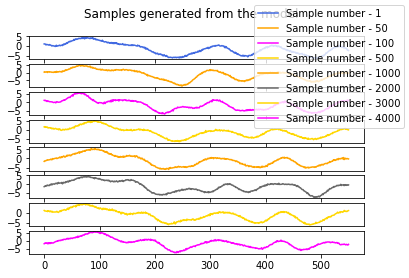

In [28]:
fig, axs = plt.subplots(8)
fig.suptitle('Samples generated from the model')
axs[0].plot(y_predict2[0], color = 'royalblue')
axs[1].plot(y_predict2[49], color = 'orange')
axs[2].plot(y_predict2[99], color = 'magenta')
axs[3].plot(y_predict2[499], color = 'gold')
axs[4].plot(y_predict2[999], color = 'orange')
axs[5].plot(y_predict2[1999], color = 'dimgray')
axs[6].plot(y_predict2[2999], color = 'gold')
axs[7].plot(y_predict2[3999], color = 'magenta')
fig.legend(['Sample number - 1', 'Sample number - 50','Sample number - 100', 'Sample number - 500', 'Sample number - 1000', 'Sample number - 2000', 'Sample number - 3000', 'Sample number - 4000'], loc = 'upper right')

In [30]:
mean_val3= []
std_val3 = []

for y in y_predict2:
    mean_val3.append(np.mean(y))
    std_val3.append(np.std(y))

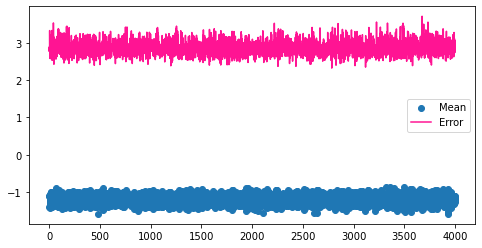

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4),sharex = True)

axes.scatter([*range(4000)], mean_val3)
axes.errorbar([*range(4000)], std_val3, color = 'deeppink')

axes.legend(['Mean','Error'])
plt.show()